In [53]:
pip install opencv-python tensorflow


1/1 [==============================] - 0s 390ms/step


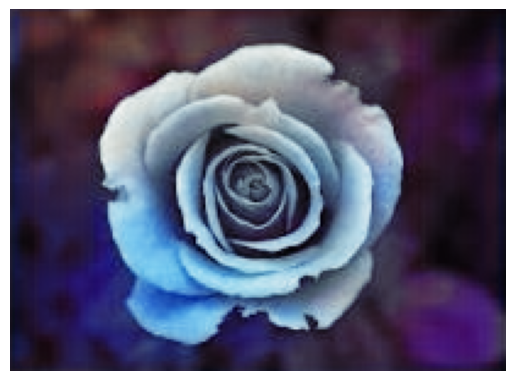

In [54]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the black and white image
image = cv2.imread("black_and_white_image.jpg", cv2.IMREAD_GRAYSCALE)

# Resize the image to the required input size of the model
input_size = (512, 512)
resized_image = cv2.resize(image, input_size)

# Expand dimensions to create a batch of 1 image
input_image = np.expand_dims(resized_image, axis=-1)  # Add channel dimension

# Normalize the input image
input_image = input_image / 255.0

# Load the pre-trained model for colorization
model = load_model("/content/model.h5")

# Predict the colorized image
colorized_image = model.predict(np.expand_dims(input_image, axis=0))[0]

# Rescale the colorized image to the original size
colorized_image = cv2.resize(colorized_image, (image.shape[1], image.shape[0]))

# Convert the colorized image to BGR color space
colorized_image_bgr = cv2.cvtColor(colorized_image, cv2.COLOR_RGB2BGR)

# Display the colorized image
plt.imshow(colorized_image_bgr)
plt.axis('off')  # Hide axis
plt.show()
